In [1]:
import sys

In [2]:
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [3]:
#판다스, 넘파이 (필수 라이브러리)
# python version 3.12.4
import pandas as pd
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 변환 (feature engineering)
  1. 가족 수 만들기 (SibSp, Parch)
  2. 성별(male, female), 0,1로 바꾸기
  3. age, Fare -> 구간화(cat) -> why? 시각화를 해 보고...
  4. Cabin  문자와 숫자로 분할 -> 코드를 복붙

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

가족 수 만들기 (SibSp, Parch)

In [12]:
train['Family'] = train['SibSp'] + train['Parch']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


성별(male, female), 0,1로 바꾸기

In [13]:
train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
## replace
#train['sex_binary'] = train['Sex'].replace({'male': 0, 'female': 1})
## map
#train['sex_binary'] = train['Sex'].map({'male': 0, 'female': 1})
## lambda
#train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
train

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [19]:
train['Sex'].replace({'male':0, 'female':1})
# train['Sex'].map()

0           0
1      female
2      female
3      female
4           0
        ...  
886         0
887    female
888    female
889         0
890         0
Name: Sex, Length: 891, dtype: object

In [20]:
train['Sex'].map({'male':0, 'female':1})

0      0.0
1      NaN
2      NaN
3      NaN
4      0.0
      ... 
886    0.0
887    NaN
888    NaN
889    0.0
890    0.0
Name: Sex, Length: 891, dtype: float64

In [29]:
train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

Cabin  문자와 숫자로 분할 -> 코드를 복붙
 - regexg 정규식 -> 우편번호 000-000  주민번호 000000-000000 이메일 IIIIIIdidididi@0000.com

In [37]:

train[['Cabin_Cat', 'Cabin_num']] = train['Cabin'].str.extract(r'([A-Za-z]+)(\d*)')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,sex_binary,Cabin_Cat,Cabin_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,1,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,C,148


시각화


In [38]:
#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
- 범주형 변수의 시각화
   - 선실 등급별 인원수, 성별 인원수
   - 연령을 그룹별(10대, 20대, 30대~~)로 그룹핑한 후  
     ※ 그룹핑으로 숫자형 변수가 범주형(정확히는 연속형) 변수가 됨
     연령대별 인원수
   - Embarked(정박위치?)별 인원수

     ** (공통점) 범주형 변수 * 컬럼 수

     ** 범주형 변수 * 숫자형 변수 조합도 가능
   - 선실 등급별 Fare(요금) 평균, min, max, std.... 등등
   - 성별에 따른 요금
   - 연령대에 따른 요금 변화

     ** 파생변수를 통한 분석도 가능  
      -> SibSp + Parch 로 가족 수를 구할 수 있음

   - 성별에 따른 가족 수 SibSp + Parch    ※ 의미가 있을까? 아무튼
   - 연령대에 따른 가족 수
   - 가족 수에 따른 요금 변화. -> 가족 수 범위가 시각화로 보기 자연스러운 정도여야
   - Embarked에 따른 요금, 가족 수 등등등



In [ ]:
col_cnt = train['Pclass'].value_counts().sort_index()
col_cnt.index, col_cnt.values

fig, ax = plt.subplots()

In [45]:
col_cnt = train['Pclass'].value_counts().sort_index()

In [46]:
col_cnt

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [47]:
 train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

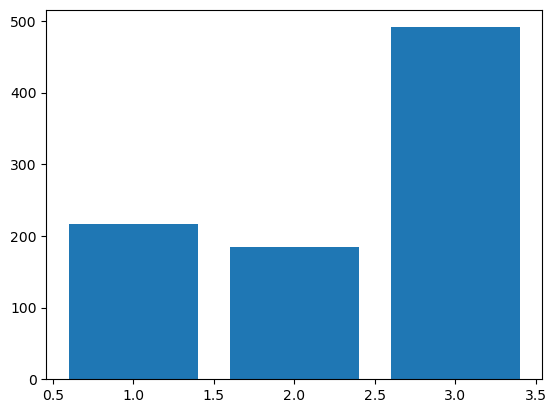

In [51]:
fig, ax = plt.subplots()
ax = ax.bar(col_cnt.index, col_cnt.values)
plt.show()

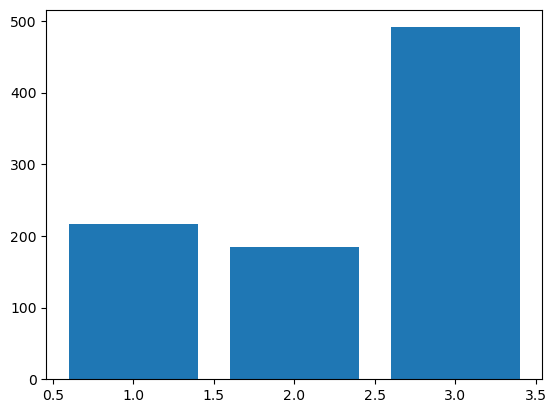

In [54]:
fig, ax = plt.subplots()
ax = ax.bar(col_cnt.index, col_cnt.values)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

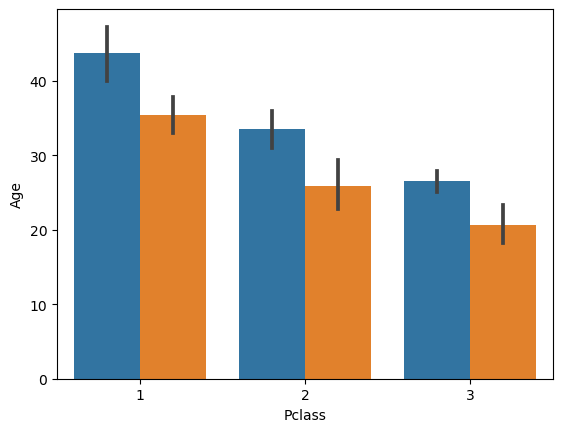

In [57]:
sns.barplot(data=train, x='Pclass', y='Age' , hue='Survived')
#data, x, y, hue=

In [74]:
train.groupby(['Pclass','sex_binary']).Survived.describe()

count      mean       std  min  25%  50%  75%  max
Pclass sex_binary                                                    
1      0           122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
       1            94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
2      0           108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
       1            76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
3      0           347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0
       1           144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0

In [73]:
train.groupby(['Pclass']).describe()

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Pclass                                                                          
1            216.0  461.597222  246.737616   2.0  270.75  472.0  670.5  890.0   
2            184.0  445.956522  250.852161  10.0  234.50  435.5  668.0  887.0   
3            491.0  439.154786  264.441453   1.0  200.00  432.0  666.5  891.0   

       Survived            ... Family       sex_binary                      \
          count      mean  ...    75%   max      count      mean       std   
Pclass                     ...                                               
1         216.0  0.629630  ...   1.00   5.0      216.0  0.435185  0.496933   
2         184.0  0.472826  ...   1.25   5.0      184.0  0.413043  0.493724   
3         491.0  0.242363  ...   1.00  10.0      491.0  0.293279  0.455730   

                                 
        min  25%  50%  75%  max  
Pclass                           
1       0.0  0.0  0.0  1.0  1.0  
2       0.0  0.0  0.0  1.0  1.0  
3       0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

AttributeError: 'numpy.int64' object has no attribute 'startswith'

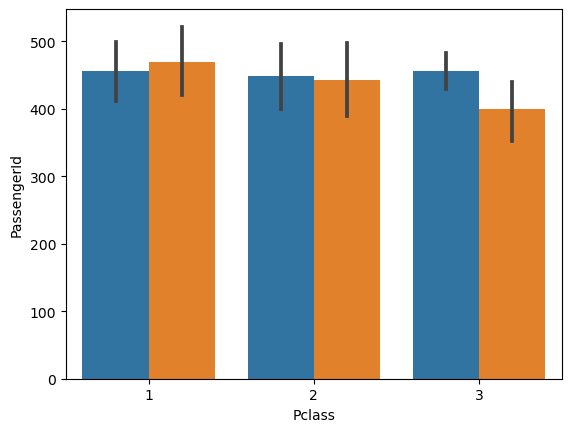

In [76]:
sns.barplot(train, x='Pclass', y='PassengerId', hue='sex_binary')

In [81]:
plot_data = train.groupby(['Family']).Survived.mean()

In [86]:
# 가족별로 플롯 만들어서 구분한거

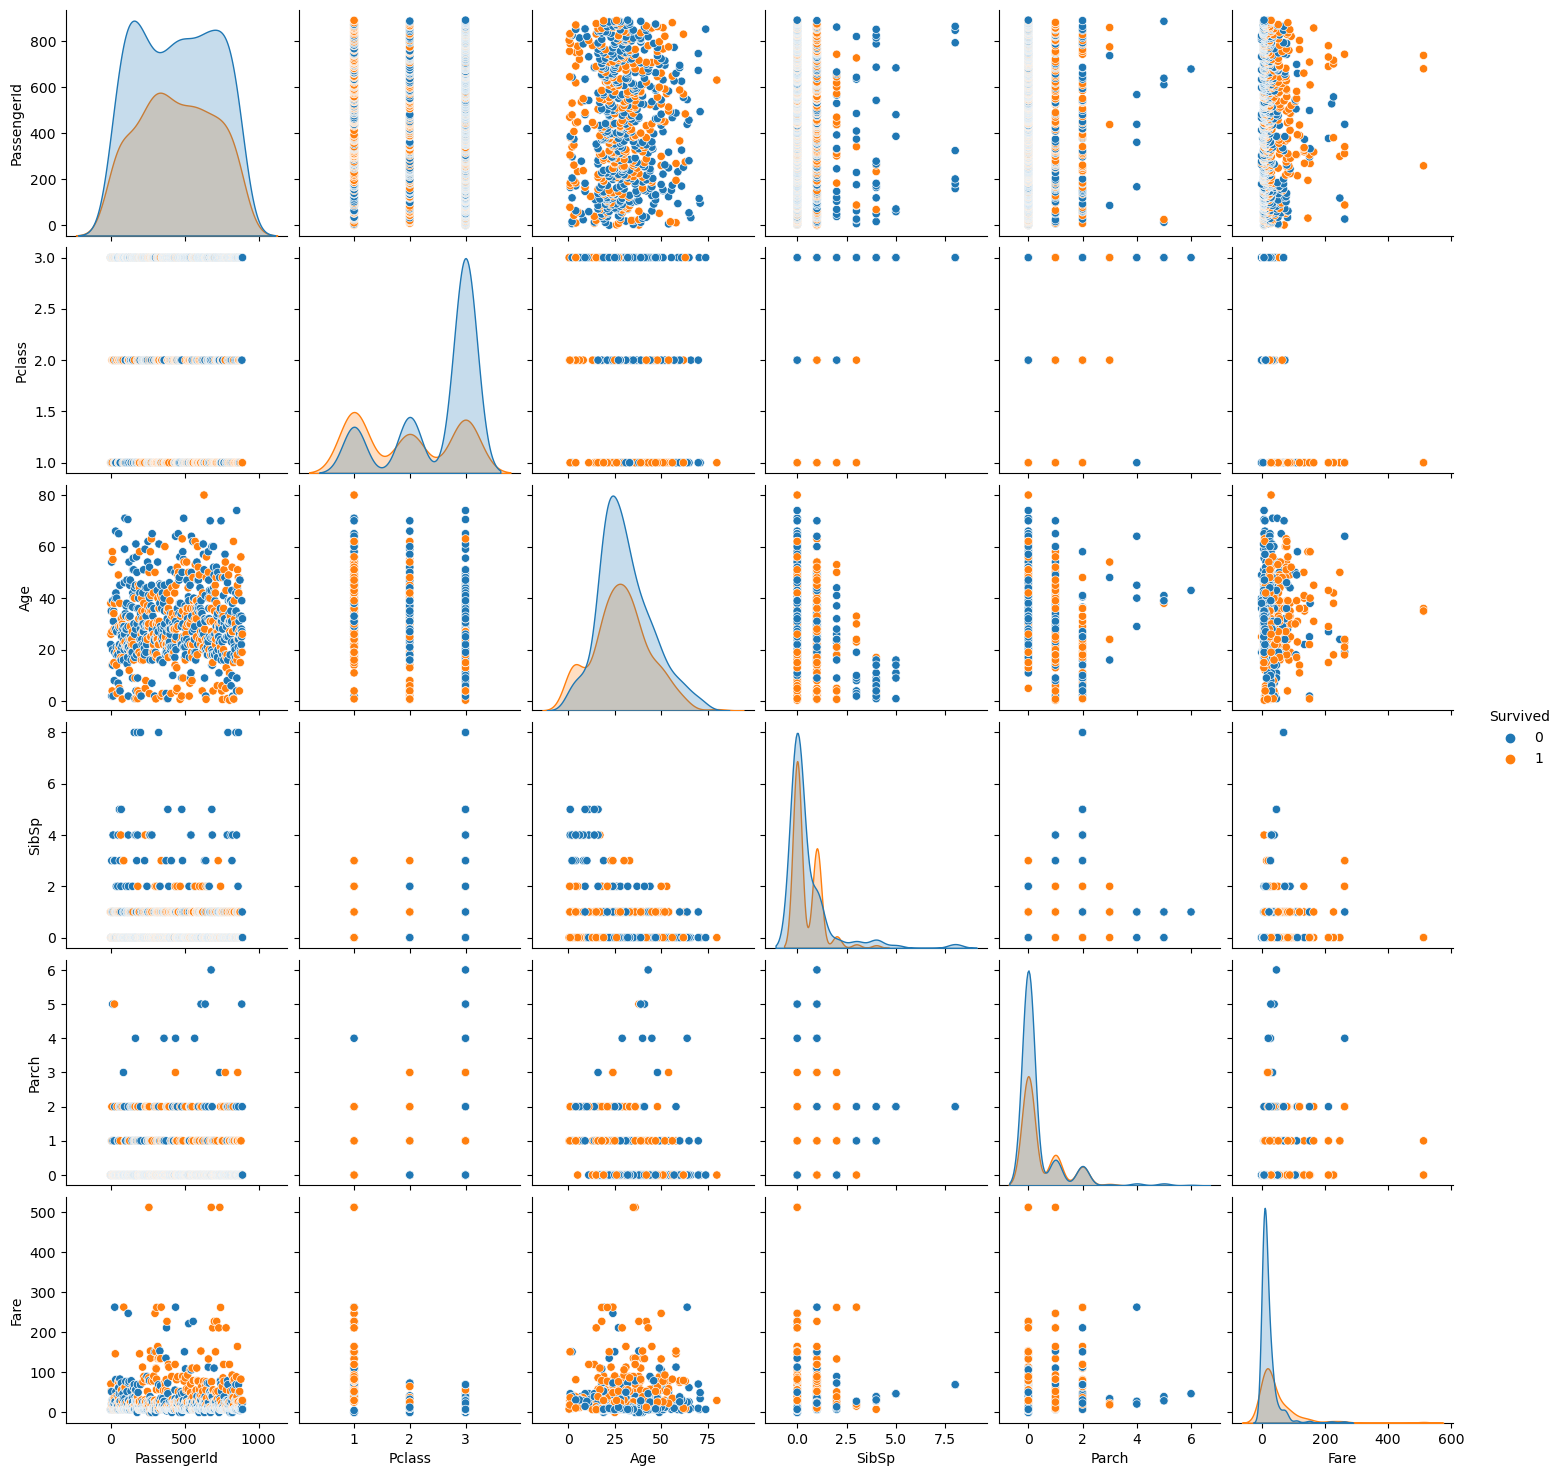

In [89]:
sns.pairplot(train, hue='Survived')

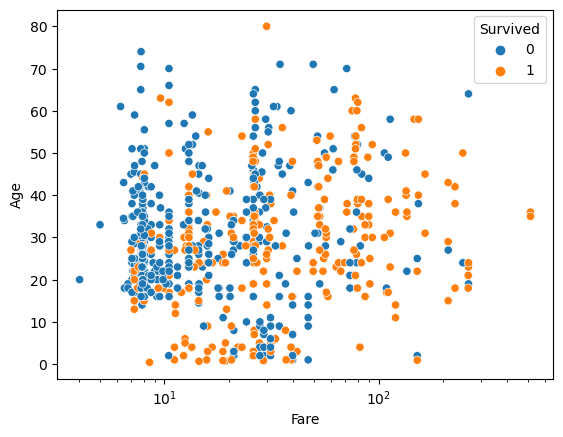

In [91]:
sns.scatterplot(train, x='Fare', y='Age', hue='Survived')
plt.xscale('log')

<Axes: xlabel='Fare', ylabel='Age'>

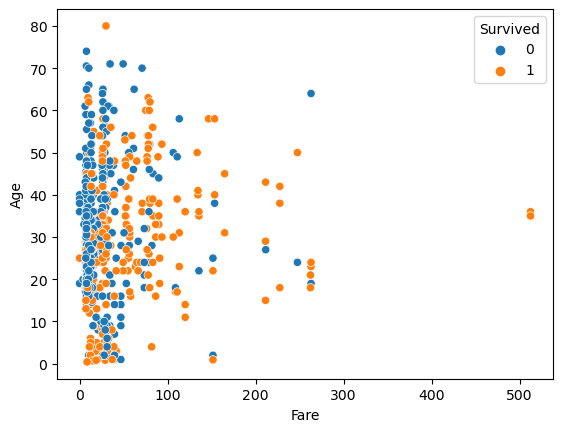

In [92]:
sns.scatterplot(train, x='Fare', y='Age', hue='Survived')

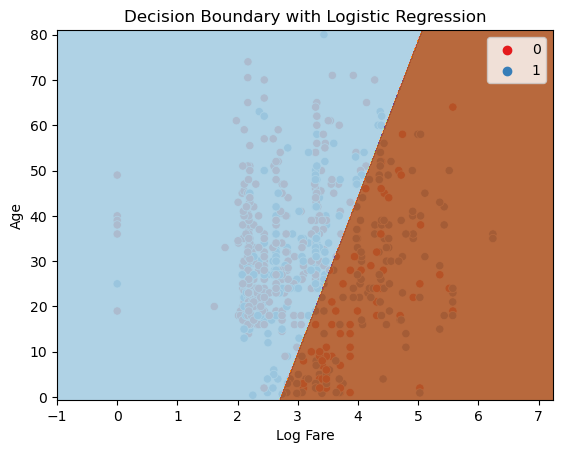

In [101]:
## 요거는 그냥 붙여넣어서 봅시다.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 준비
X = np.column_stack((np.log(train['Fare'].values + 1), train['Age'].values))  # Fare와 Age를 특징으로 사용
y = train['Survived'].values  # 목표 변수 (생존 여부)

# NaN 값이 있는 행 제거
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]


# 데이터 분할 (훈련 및 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 결정 경계 그리기 위한 메쉬 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 예측 값으로 결정 경계 시각화
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


#1 영역
#2 스캐터
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1')
plt.contourf(xx, yy, Z, alpha=0.9, cmap=plt.cm.Paired)


plt.xlabel('Log Fare')
plt.ylabel('Age')
plt.title('Decision Boundary with Logistic Regression')

plt.show()
